In [3]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

!pip install scikit-plot

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Loading required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report,auc
from sklearn.metrics import precision_recall_curve,roc_auc_score,roc_curve
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.preprocessing import label_binarize

from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout

import pydot
import graphviz
import random

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the dataset
df_train = pd.read_csv('/content/drive/MyDrive/MIT-BIH Dataset/mitbih_train.csv',header=None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_train.shape

(87554, 188)

In [5]:
df_train[187].unique()

array([0., 1., 2., 3., 4.])

In [6]:
class_names = ['N','S','V','F','Q']

In [7]:
df_test = pd.read_csv('/content/drive/MyDrive/MIT-BIH Dataset/mitbih_test.csv', header=None)

In [8]:
df_test.shape

(21892, 188)

In [9]:
df_test[187].unique()

array([0., 1., 2., 3., 4.])

In [10]:
df_train = df_train.rename(columns = {187 : 'label'})
df_test = df_test.rename(columns = {187 : 'label'})

In [11]:

df_train['label'] = df_train['label'].astype('uint8')
df_test['label'] = df_test['label'].astype('uint8')

In [12]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,label
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [13]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,label
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [14]:
df_train.shape
df_test.shape

(21892, 188)

In [15]:
#classes count
df_class=df_train['label'].value_counts()
print('Count of classes :\n',df_class)
#Percentages of class counts
per_class=df_train['label'].value_counts()/len(df_train)*100
print('percentage of count of classes :\n',per_class)

Count of classes :
 0    72471
4     6431
2     5788
1     2223
3      641
Name: label, dtype: int64
percentage of count of classes :
 0    82.772917
4     7.345181
2     6.610777
1     2.539005
3     0.732120
Name: label, dtype: float64


In [16]:
# Train data
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Test data
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

In [17]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
87549    4
87550    4
87551    4
87552    4
87553    4
Name: label, Length: 87554, dtype: uint8

In [18]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter= Counter(y_train)
print(f'Before Sampling', counter)
# Oversampling the train data using SMOTE
smt=SMOTE()
X_train_sm,y_train_sm = smt.fit_resample(X_train,y_train)
counter= Counter(y_train_sm)
print('After Sampling', counter)

Before Sampling Counter({0: 72471, 4: 6431, 2: 5788, 1: 2223, 3: 641})
After Sampling Counter({0: 72471, 1: 72471, 2: 72471, 3: 72471, 4: 72471})


In [19]:
# Adding some noise to increase efficiency of the trained model
def gaussian_noise(signal):
    noise = np.random.normal(0,0.05,187)
    return signal + noise
# Input to the model
X_train = X_train.values
# Adding noise
for i in range(X_train.shape[0]):
    X_train[i, :] = gaussian_noise(X_train[i, :])

# Convert X_train into dataframe
X_train = pd.DataFrame(X_train)

In [20]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.967312,0.979697,0.663650,0.223870,0.139564,0.203633,0.134898,0.059164,0.150626,0.084412,...,0.086911,-0.050983,0.112180,0.021798,0.061803,0.034390,0.002755,0.037910,0.073279,0.011929
1,0.917166,0.888707,0.432091,0.230027,0.089712,0.097048,0.081986,0.068968,0.109268,0.048256,...,0.077170,0.049945,0.004923,0.071021,-0.071127,-0.057291,-0.033615,-0.029676,-0.007433,-0.062433
2,1.013992,0.584806,0.345499,0.073319,0.029881,0.092705,0.057897,0.085237,-0.004418,0.099563,...,0.002616,0.053509,0.074345,-0.011972,-0.080278,0.029992,-0.044880,0.068222,-0.081928,0.019854
3,0.879770,0.683803,0.538484,0.316291,0.203628,0.009960,0.067556,-0.004314,0.035850,0.063305,...,0.111494,0.016762,0.063006,0.015720,-0.055806,-0.011424,-0.086180,-0.041790,-0.033885,0.004129
4,0.986534,1.023016,0.905328,0.637961,0.387577,0.246795,0.274895,0.219924,0.197299,0.140036,...,0.005317,0.051623,0.003741,0.001989,-0.011910,0.040174,-0.017559,0.018257,0.025004,-0.033694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.817800,0.530193,0.570428,0.547006,0.384181,0.442152,0.461690,0.424269,0.205481,0.126924,...,0.022582,-0.054166,0.126733,0.006633,0.033255,0.070128,0.026107,-0.018108,0.032922,-0.017949
87550,0.623841,0.645592,0.538915,0.261576,0.192192,0.143780,0.077492,-0.024770,0.066440,-0.002222,...,0.109564,-0.044638,0.053348,0.039059,0.020016,0.005407,-0.078576,0.029416,0.055192,-0.119485
87551,0.986051,0.598985,0.579976,0.578147,0.579828,0.532200,0.486447,0.363899,0.359643,0.210457,...,-0.062516,0.029002,0.069722,-0.018760,-0.030603,0.030397,-0.006703,0.059016,0.012086,0.050711
87552,0.865136,0.685002,0.919182,0.243544,0.143988,0.156827,0.123991,0.073859,0.097687,0.076519,...,0.023026,0.024297,0.005766,-0.010009,-0.018904,-0.047344,0.076833,-0.059266,0.044018,0.033798


In [21]:
#Split data into train set(80%) & test set (20%)
X_train, X_val, y_train, y_val =train_test_split(X_train, y_train, stratify = y_train, test_size=0.2, random_state=42)

In [22]:
# One hot encoding the output of the model
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [23]:
y_test

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [24]:
y_train.shape

(70043, 5)

In [25]:
X_train.shape

(70043, 187)

In [26]:
# Convert to numpy arrays
x_train = np.array(X_train)
x_val = np.array(X_val)
x_test = np.array(X_test)

In [27]:
x_test

array([[1.        , 0.75826448, 0.11157025, ..., 0.        , 0.        ,
        0.        ],
       [0.90842491, 0.7838828 , 0.53113556, ..., 0.        , 0.        ,
        0.        ],
       [0.73008847, 0.21238938, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.96735907, 0.62017804, ..., 0.        , 0.        ,
        0.        ],
       [0.98412699, 0.5674603 , 0.60714287, ..., 0.        , 0.        ,
        0.        ],
       [0.97396964, 0.91323209, 0.86550975, ..., 0.        , 0.        ,
        0.        ]])

In [28]:
X_train =x_train.reshape(x_train.shape[0], 1, x_train.shape[1])   # number of time steps is 1
X_val =x_val.reshape(x_val.shape[0], 1, x_val.shape[1])   # number of time steps is 1
X_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])     # number of time steps is 1

In [29]:
n_classes = y_train.shape[1]
n_classes

5

In [30]:
input_shape = X_train.shape[1:]
input_shape

(1, 187)

In [31]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


model1 = Sequential()

# Convolutional Neural Network (CNN) layers
model1.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same', input_shape=input_shape))
model1.add(BatchNormalization())
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model1.add(BatchNormalization())

# MaxPooling1D layer instead of GlobalMaxPooling1D
# model2.add(MaxPooling1D(pool_size=2))
model1.add(Dropout(0.5))

# Fully connected layers
model1.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))

# GRU Layer
num_gru_units = 64
model1.add(GRU(num_gru_units, return_sequences=False))  # Using GRU layer instead of LSTM

# Fully Connected Layer
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(n_classes, activation='softmax'))

# Compile the model with a learning rate scheduler
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True
)
optimizer = Adam(learning_rate=lr_schedule)
model1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model summary
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 128)            71936     
                                                                 
 batch_normalization (BatchN  (None, 1, 128)           512       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 64)             24640     
                                                                 
 batch_normalization_1 (Batc  (None, 1, 64)            256       
 hNormalization)                                                 
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 64)             12352     
                                                                 
 batch_normalization_2 (Batc  (None, 1, 64)            2

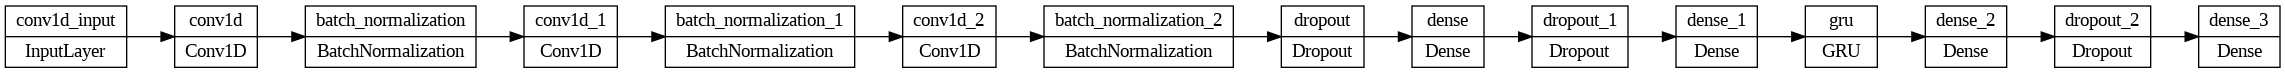

In [32]:
from IPython.display import Image, display
from keras.utils.vis_utils import model_to_dot
import pydot

# Create a Dot object for the model
dot = model_to_dot(model1)

# Modify the Dot object to set the horizontal layout
dot.set_rankdir('LR')

# Convert Dot object to PNG image using Graphviz
png_image = dot.create_png()

# Display the image using IPython.display
display(Image(png_image))


In [33]:
batch_size = 16

history1 = model1.fit(X_train, y_train, batch_size=batch_size,epochs=25,validation_data=(X_val, y_val))

Epoch 1/25
4378/4378 [==============================] - 53s 9ms/step - loss: 0.4708 - accuracy: 0.8843 - val_loss: 0.2730 - val_accuracy: 0.9316
Epoch 2/25
4378/4378 [==============================] - 43s 10ms/step - loss: 0.3112 - accuracy: 0.9249 - val_loss: 0.2245 - val_accuracy: 0.9463
Epoch 3/25
4378/4378 [==============================] - 43s 10ms/step - loss: 0.2678 - accuracy: 0.9353 - val_loss: 0.1969 - val_accuracy: 0.9533
Epoch 4/25
4378/4378 [==============================] - 42s 9ms/step - loss: 0.2481 - accuracy: 0.9401 - val_loss: 0.2147 - val_accuracy: 0.9478
Epoch 5/25
4378/4378 [==============================] - 42s 10ms/step - loss: 0.2299 - accuracy: 0.9447 - val_loss: 0.1789 - val_accuracy: 0.9543
Epoch 6/25
4378/4378 [==============================] - 41s 9ms/step - loss: 0.2171 - accuracy: 0.9471 - val_loss: 0.1669 - val_accuracy: 0.9584
Epoch 7/25
4378/4378 [==============================] - 43s 10ms/step - loss: 0.2046 - accuracy: 0.9513 - val_loss: 0.1568 - va

In [34]:
# list all data in history
print(history1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


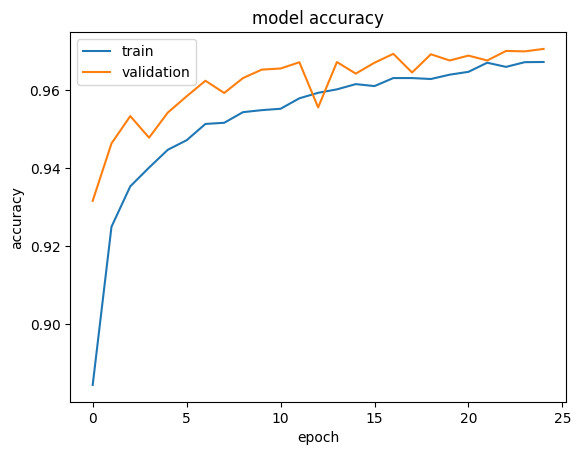

In [35]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

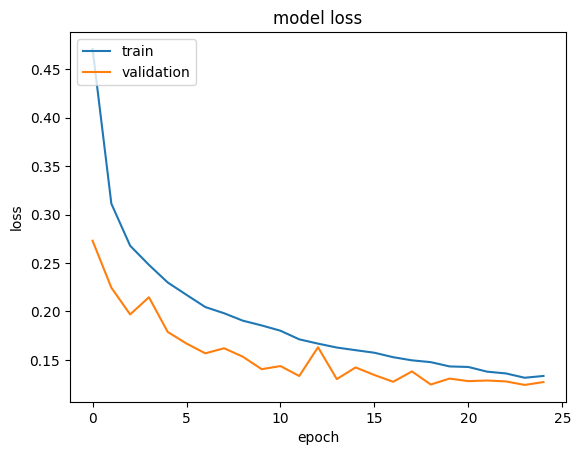

In [36]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [37]:
import numpy as np
import tensorflow as tf
from datetime import datetime

start_time = datetime.now()
y_pred = model1.predict(X_test)
end_time = datetime.now()
y_pred

testing_time = end_time - start_time
print(f"Testing time: {testing_time}")

685/685 [==============================] - 3s 3ms/step
Testing time: 0:00:03.229926


In [38]:
y_pred = y_pred.argmax(axis=1)
y_pred

array([0, 0, 0, ..., 4, 4, 4])

In [41]:
y_test = y_test.argmax(axis=1)
y_test

array([0, 0, 0, ..., 4, 4, 4])

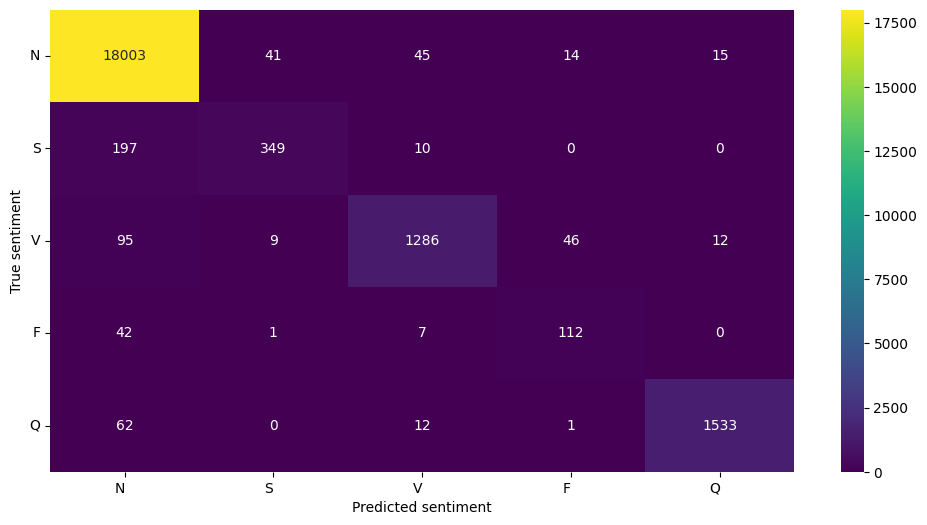

In [42]:
def show_confusion_matrix(confusion_matrix):
  plt.figure(figsize=(12,6))
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="viridis")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(),rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(),rotation=0, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment')
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [43]:
class_report= classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18118
           1       0.87      0.63      0.73       556
           2       0.95      0.89      0.92      1448
           3       0.65      0.69      0.67       162
           4       0.98      0.95      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.89      0.83      0.85     21892
weighted avg       0.97      0.97      0.97     21892



In [44]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Add, Activation, Input


# Input layer
input_layer = Input(shape=input_shape)

# Convolutional Neural Network (CNN) layer
num_filters = 64
kernel_size = 3
cnn_output = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu', padding='same')(input_layer)

# Residual connection for CNN
residual_cnn = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='linear', padding='same')(cnn_output)
cnn_output = Add()([cnn_output, residual_cnn])
cnn_output = Activation('relu')(cnn_output)

# LSTM Layer
num_lstm_units = 64
lstm_output = LSTM(num_lstm_units, return_sequences=False)(cnn_output)

# Residual connection for LSTM
residual_lstm = Dense(num_lstm_units, activation='linear')(lstm_output)
lstm_output = Add()([lstm_output, residual_lstm])
lstm_output = Activation('relu')(lstm_output)

# Fully connected layers
dense1 = Dense(64, activation='relu')(lstm_output)
dense2 = Dense(32, activation='relu')(dense1)

# Output layer
output_layer = Dense(n_classes, activation='softmax')(dense2)

# Create the model
model2 = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model2.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 187)]     0           []                               
                                                                                                  
 conv1d_3 (Conv1D)              (None, 1, 64)        35968       ['input_1[0][0]']                
                                                                                                  
 conv1d_4 (Conv1D)              (None, 1, 64)        12352       ['conv1d_3[0][0]']               
                                                                                                  
 add (Add)                      (None, 1, 64)        0           ['conv1d_3[0][0]',               
                                                                  'conv1d_4[0][0]']           

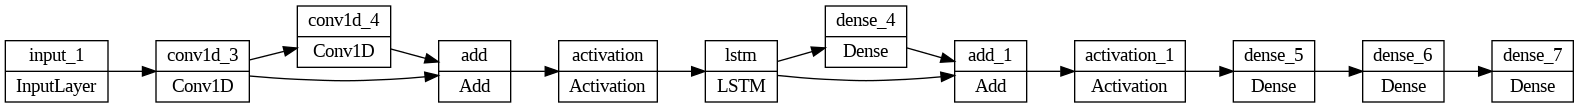

In [45]:
from IPython.display import Image, display
from keras.utils.vis_utils import model_to_dot
import pydot

# Create a Dot object for the model
dot = model_to_dot(model2)

# Modify the Dot object to set the horizontal layout
dot.set_rankdir('LR')

# Convert Dot object to PNG image using Graphviz
png_image = dot.create_png()

# Display the image using IPython.display
display(Image(png_image))


In [46]:
batch_size = 16

history2 = model2.fit(X_train, y_train, batch_size=batch_size,epochs=25,validation_data=(X_val, y_val))

Epoch 1/25
4378/4378 [==============================] - 29s 6ms/step - loss: 0.2953 - accuracy: 0.9191 - val_loss: 0.1812 - val_accuracy: 0.9525
Epoch 2/25
4378/4378 [==============================] - 27s 6ms/step - loss: 0.1692 - accuracy: 0.9529 - val_loss: 0.1659 - val_accuracy: 0.9547
Epoch 3/25
4378/4378 [==============================] - 25s 6ms/step - loss: 0.1388 - accuracy: 0.9616 - val_loss: 0.1291 - val_accuracy: 0.9661
Epoch 4/25
4378/4378 [==============================] - 28s 6ms/step - loss: 0.1220 - accuracy: 0.9657 - val_loss: 0.1242 - val_accuracy: 0.9645
Epoch 5/25
4378/4378 [==============================] - 29s 7ms/step - loss: 0.1111 - accuracy: 0.9686 - val_loss: 0.1163 - val_accuracy: 0.9694
Epoch 6/25
4378/4378 [==============================] - 28s 6ms/step - loss: 0.1013 - accuracy: 0.9710 - val_loss: 0.1237 - val_accuracy: 0.9643
Epoch 7/25
4378/4378 [==============================] - 35s 8ms/step - loss: 0.0941 - accuracy: 0.9725 - val_loss: 0.1286 - val_ac

In [47]:
# list all data in history
print(history2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


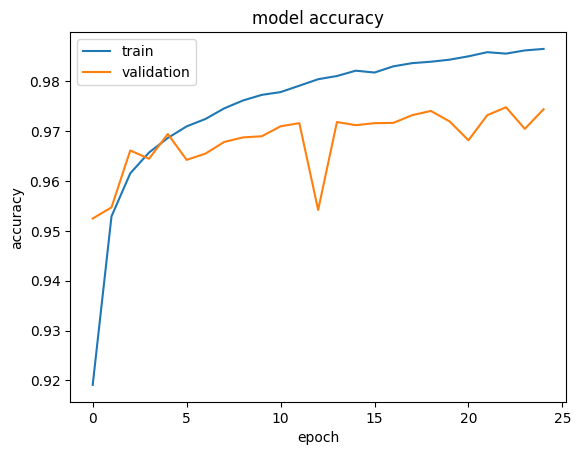

In [48]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

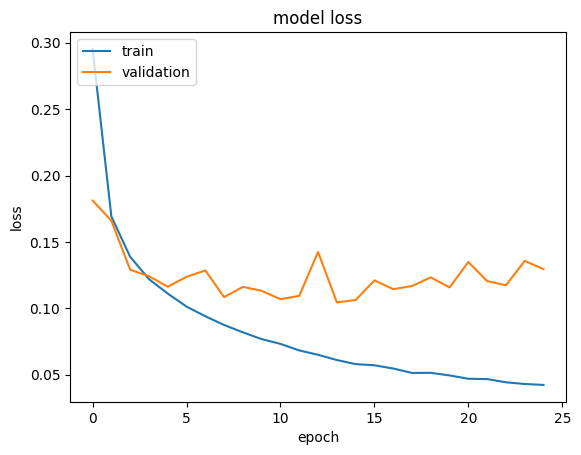

In [49]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [50]:
import numpy as np
import tensorflow as tf
from datetime import datetime

start_time = datetime.now()
y_pred = model2.predict(X_test)
end_time = datetime.now()
y_pred

testing_time = end_time - start_time
print(f"Testing time: {testing_time}")

685/685 [==============================] - 2s 2ms/step
Testing time: 0:00:02.352887


In [51]:
y_pred = y_pred.argmax(axis=1)
y_pred

array([0, 0, 0, ..., 4, 4, 4])

In [52]:
#y_test = y_test.argmax(axis=1)
#y_test

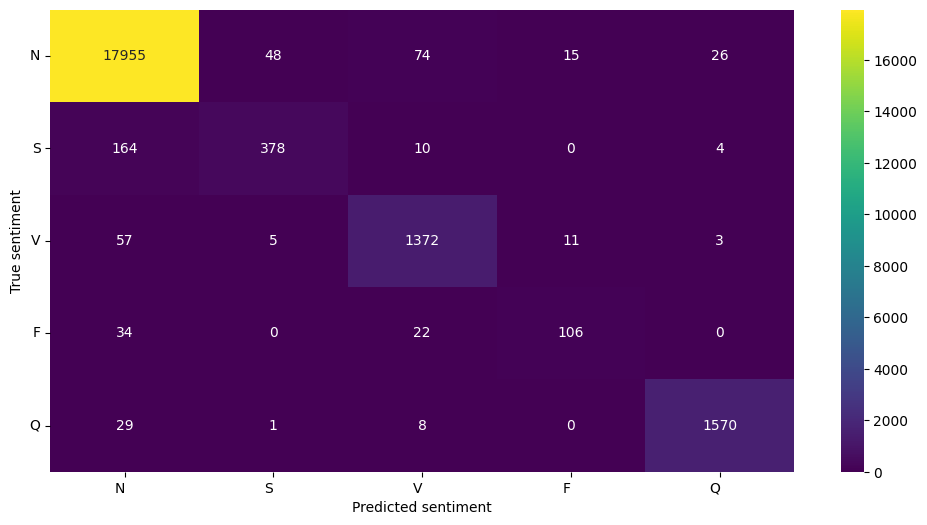

In [53]:
def show_confusion_matrix(confusion_matrix):
  plt.figure(figsize=(12,6))
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="viridis")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(),rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(),rotation=0, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment')
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [54]:
class_report= classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18118
           1       0.88      0.68      0.77       556
           2       0.92      0.95      0.94      1448
           3       0.80      0.65      0.72       162
           4       0.98      0.98      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.91      0.85      0.88     21892
weighted avg       0.98      0.98      0.98     21892

